In [12]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf, msd

# 定义温度列表
temperatures = [2, 1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]

In [27]:
# 定义温度对应的 .lammpstrj 和 .unwrap.dcd 文件路径
file_paths = {
    2.0: {
        "lammpstrj": "../Data/equil/kalj_T2_n360_v300_10000_1.lammpstrj",
        "dcd": None  # 这个温度的 dcd 文件似乎不存在
    },
    1.5: {
        "lammpstrj": "../Data/equil/kalj_T1.5_n360_v300_10000_1.lammpstrj",
        "dcd": "../Data/prod/kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd"
    },
    1.0: {
        "lammpstrj": "../Data/equil/kalj_T1_n360_v300_50000_1.lammpstrj",
        "dcd": "../Data/prod/kalj_T1_n360_v300_prod_50000_1.unwrap.dcd"
    },
    0.9: {
        "lammpstrj": "../Data/equil/kalj_T0.9_n360_v300_150000_1.lammpstrj",
        "dcd": "../Data/prod/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd"
    },
    0.8: {
        "lammpstrj": "../Data/equil/kalj_T0.8_n360_v300_150000_1.lammpstrj",
        "dcd": "../Data/prod/kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd"
    },
    0.7: {
        "lammpstrj": "../Data/equil/kalj_T0.7_n360_v300_180000_1.lammpstrj",
        "dcd": "../Data/prod/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd"
    },
    0.65: {
        "lammpstrj": "../Data/equil/kalj_T0.65_n360_v300_350000_1.lammpstrj",
        "dcd": "../Data/prod/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd"
    },
    0.6: {
        "lammpstrj": "../Data/equil/kalj_T0.6_n360_v300_1000000_1.lammpstrj",
        "dcd": "../Data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd"
    },
    0.55: {
        "lammpstrj": "../Data/equil/kalj_T0.55_n360_v300_3000000_1.lammpstrj",
        "dcd": "../Data/prod/kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd"
    }
}


## Radius Distribution Function

In [29]:
def compute_and_plot_rdf(temp):
    traj_file = file_paths[temp]["lammpstrj"]
    dcd_file = file_paths[temp]["dcd"]
    
    # 检查 dcd 文件是否存在
    if dcd_file is None:
        print(f"Skipping T={temp} as .dcd file is missing.")
        return
    
    u = mda.Universe(traj_file, dcd_file, topology_format="LAMMPSDUMP")
    
    # 选择粒子类型
    type1 = u.select_atoms("type 1")
    type2 = u.select_atoms("type 2")
    
    # 计算和绘制 RDF
    plt.figure(figsize=(10, 6))
    rdf_11 = rdf.InterRDF(type1, type1)
    rdf_11.run()
    plt.plot(rdf_11.bins, rdf_11.rdf, label=f"g_11(r) at T={temp}", color="blue")
    
    rdf_22 = rdf.InterRDF(type2, type2)
    rdf_22.run()
    plt.plot(rdf_22.bins, rdf_22.rdf, label=f"g_22(r) at T={temp}", color="green")
    
    rdf_12 = rdf.InterRDF(type1, type2)
    rdf_12.run()
    plt.plot(rdf_12.bins, rdf_12.rdf, label=f"g_12(r) at T={temp}", color="red")
    
    plt.xlabel("Distance (r)")
    plt.ylabel("g(r)")
    plt.legend()
    plt.title(f"Radial Distribution Functions at T={temp}")
    plt.savefig(f"../Figures/rdf_T{temp}.png")
    plt.show()


## Mean Square Deviation

In [22]:
def compute_and_plot_msd(temp):
    # 使用文件路径字典中的路径
    traj_file = file_paths[temp]["lammpstrj"]
    dcd_file = file_paths[temp]["dcd"]
    
    # 加载轨迹
    u = mda.Universe(traj_file, dcd_file, topology_format="LAMMPSDUMP")
    
    # 计算 MSD
    msd_analysis = msd.EinsteinMSD(u, select="type 1", msd_type='xyz', fft=True)
    msd_analysis.run()
    
    # 绘制 MSD
    plt.loglog(msd_analysis.times, msd_analysis.results.timeseries, label=f"T={temp}")
    
    # 查找 MSD = 1 时的时间
    time_at_msd_1 = np.interp(1, msd_analysis.results.timeseries, msd_analysis.times)
    return time_at_msd_1


## Calculation

Skipping T=2.0 as .dcd file is missing.


/scratch/fh2268/anaconda3/envs/basic/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/scratch/fh2268/anaconda3/envs/basic/lib/python3.11/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/scratch/fh2268/anaconda3/envs/basic/lib/python3.11/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please 

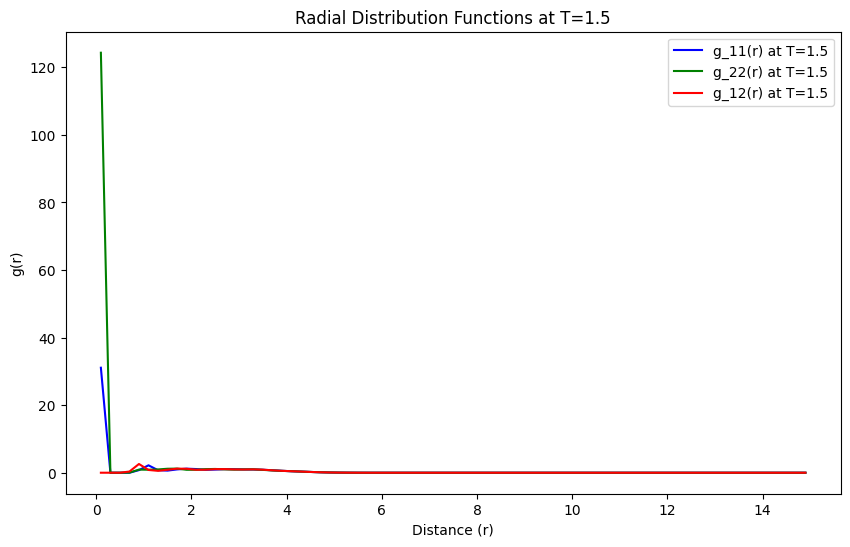

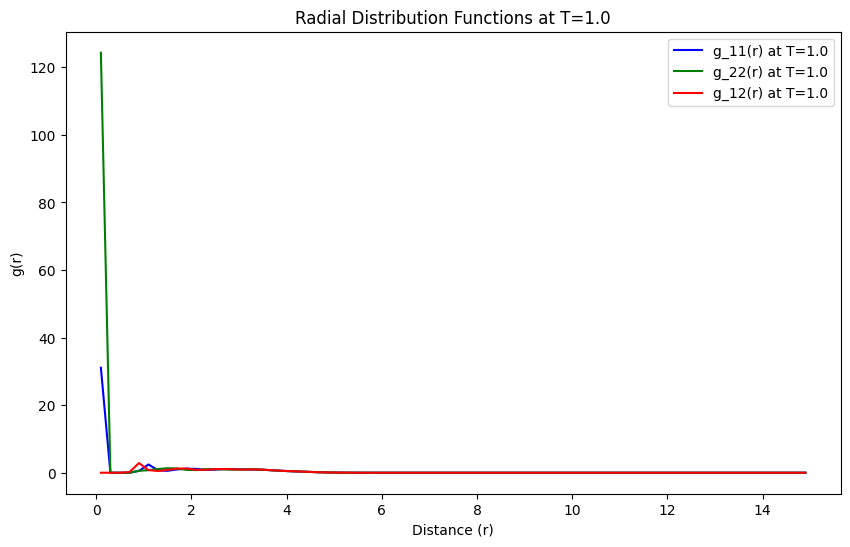

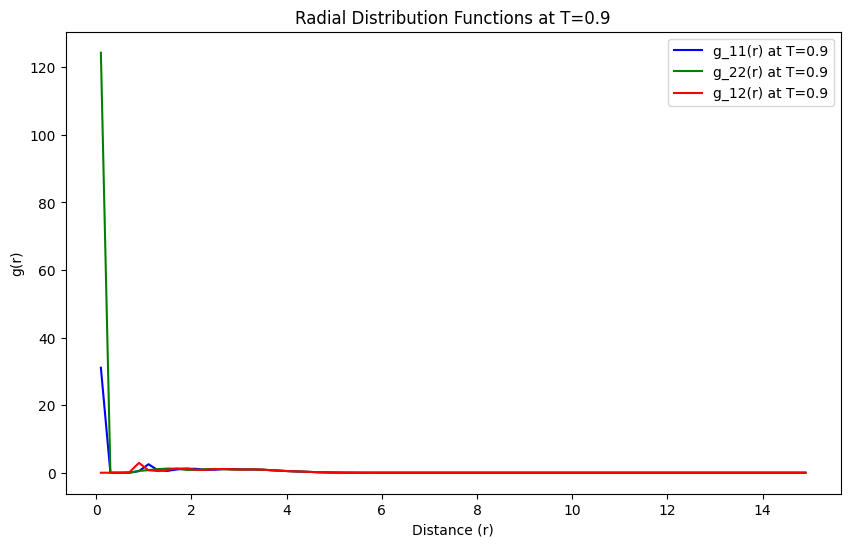

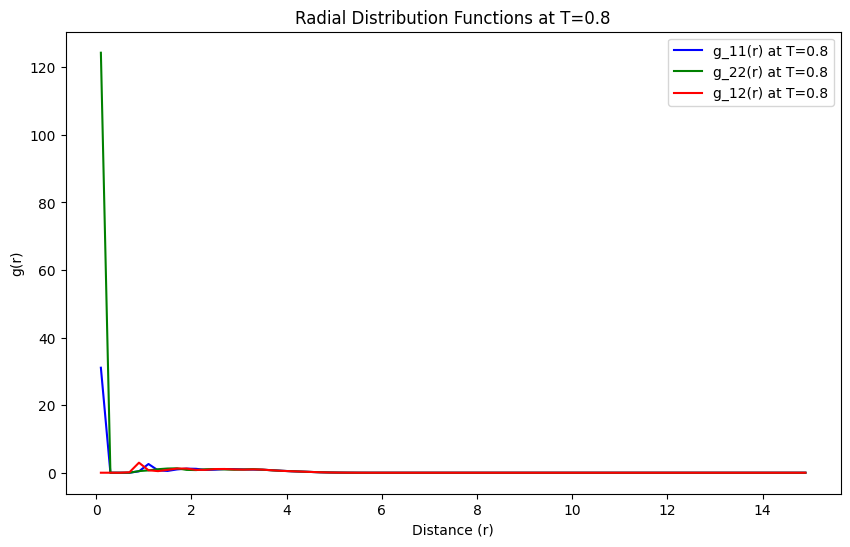

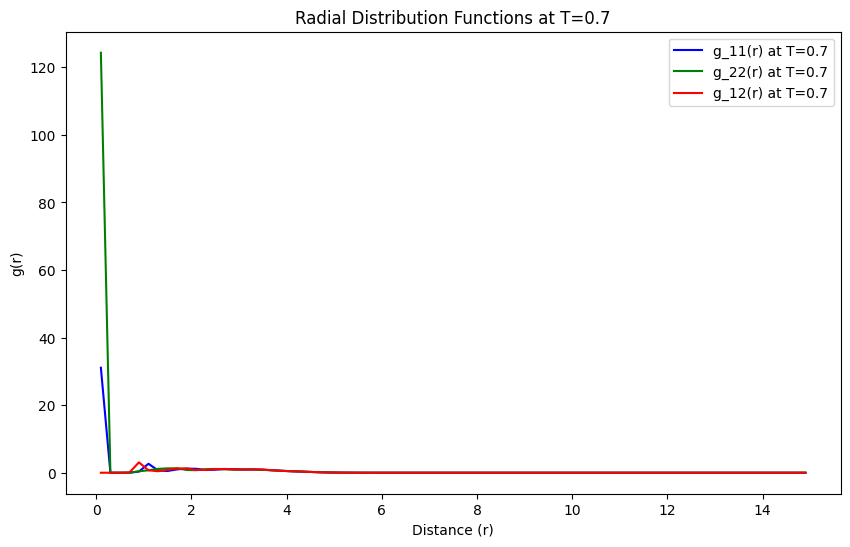

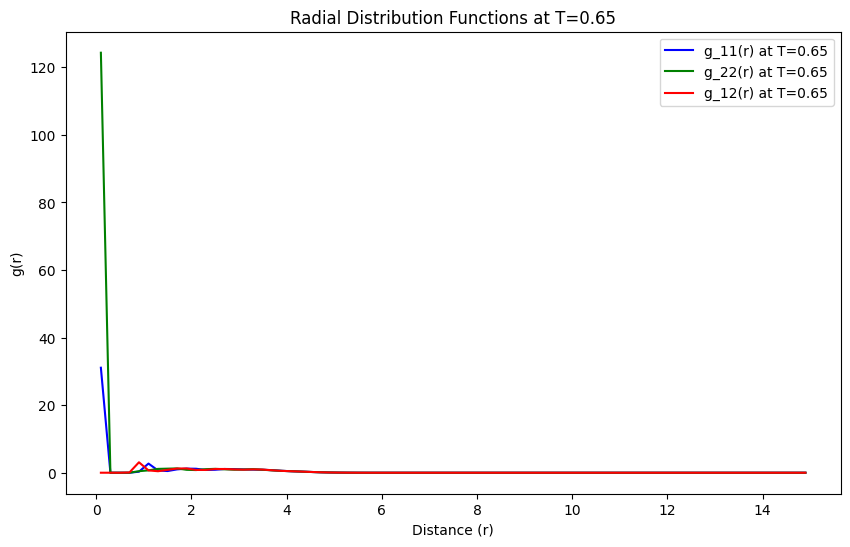

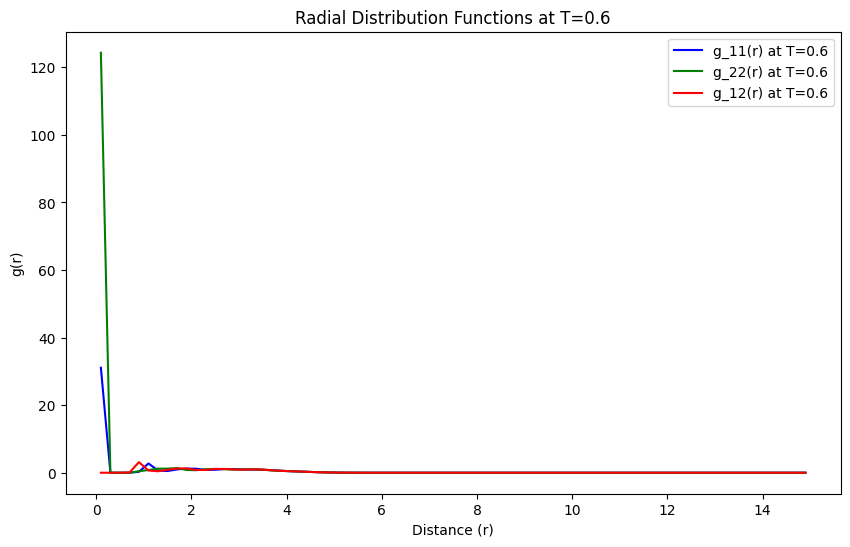

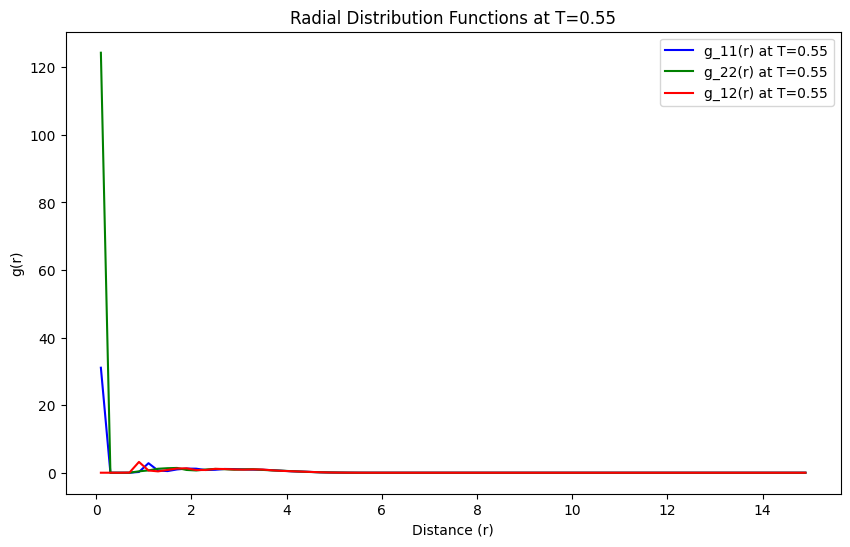

TypeError: Cannot determine file format for file 'None'.
           You can set the format explicitly with 'Universe(..., format=FORMAT)'.

<Figure size 1000x600 with 0 Axes>

In [30]:
# 计算和绘制所有温度下的 RDF
for temp in file_paths:
    compute_and_plot_rdf(temp)

# 计算和绘制所有温度下的 MSD
diffusion_times = []
plt.figure(figsize=(10, 6))
for temp in file_paths:
    time_at_msd_1 = compute_and_plot_msd(temp)
    diffusion_times.append(time_at_msd_1)

plt.xlabel("Time (log scale)")
plt.ylabel("MSD (log scale)")
plt.legend()
plt.title("Mean-Squared Displacement for Type 1 Particles at Various Temperatures")
plt.savefig("../Figures/msd_loglog.png")
plt.show()

# 绘制 MSD = 1 的时间 vs 1/T
plt.figure(figsize=(10, 6))
plt.loglog(1/np.array(list(file_paths.keys())), diffusion_times, 'o-')
plt.xlabel("1/T (log scale)")
plt.ylabel("Time at MSD=1 (log scale)")
plt.title("Time at MSD=1 vs 1/T")
plt.savefig("../Figures/msd_time_vs_invT.png")
plt.show()


In [11]:
pwd

'/home/fh2268/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis'